# Anomoly Detection in Codeup Curriculum Access Logs
     Team TfB (Josh, Carlo, Bart)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from env import *
from wrangle import *
from explore import *
import socket

## Goals
### Answer key questions concerning historical access to the curriculum materials

In [2]:
df = wrangle.wrangle_logs() # pulls data

In [3]:
df.head() # checks content

,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,datetime,ip_name
date,,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26 09:55:03,097-105-019-061.biz.spectrum.com
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26 09:56:02,097-105-019-061.biz.spectrum.com
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26 09:56:05,097-105-019-061.biz.spectrum.com
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26 09:56:06,097-105-019-061.biz.spectrum.com
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,2018-01-26 09:56:24,097-105-019-061.biz.spectrum.com


### Section 1 

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [4]:
top_lesson(df) #calls top lesson function on overall DataFrame

,top lesson
0,javascript-i


#### Top Lesson accessed is 'javascript-i'

In [5]:
#calls function on overall DataFrame to split into programs
df_p01, df_p02, df_p03 = prog_split(df) 
#call top lesson function on program 1
top_lesson(df_p01)

,top lesson
0,javascript-i


#### Top Lesson for accessed for Program ID 1 is 'javascript-i'

In [6]:
#call top lesson function on program 1
top_lesson(df_p02)

,top lesson
0,javascript-i


#### Top Lesson for accessed for Program ID 2 is 'javascript-i'

In [7]:
#call top lesson function on program 1
top_lesson(df_p03)

,top lesson
0,classification/overview


#### Top Lesson for accessed for Program ID 3 is 'classification/overview'

# Section 2

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [8]:
low_access_users(df) #function for low access users

Web Dev program_id = 2
Data Science program_id = 3
program_id
2.0    24724
3.0     5109
Name: path, dtype: int64


#### Users with null values have a high amount of access traffic highly indicative of web-scrapping

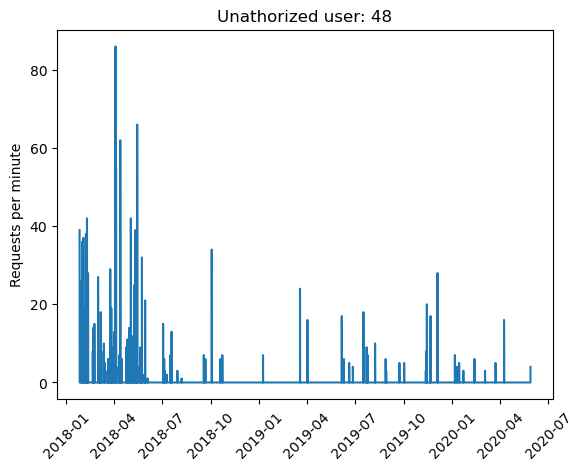

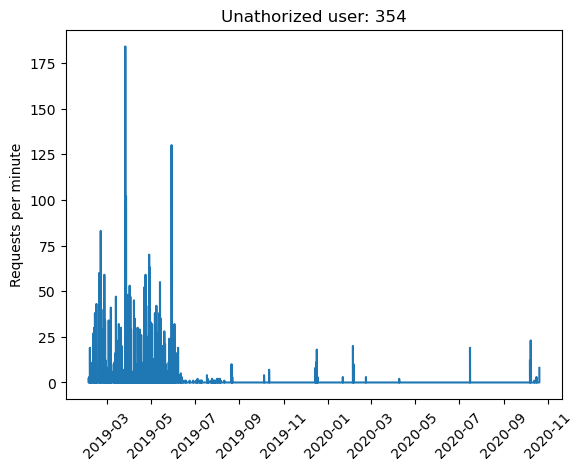

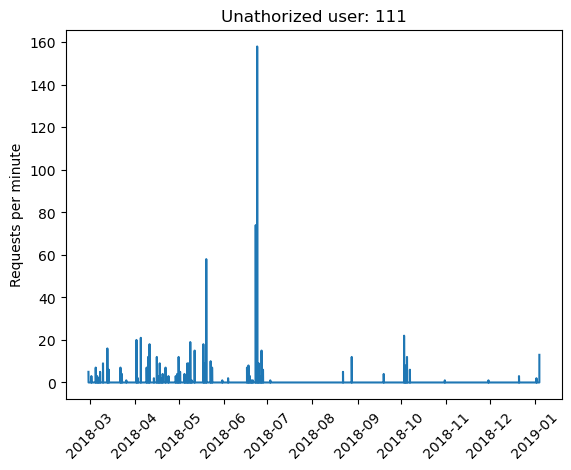

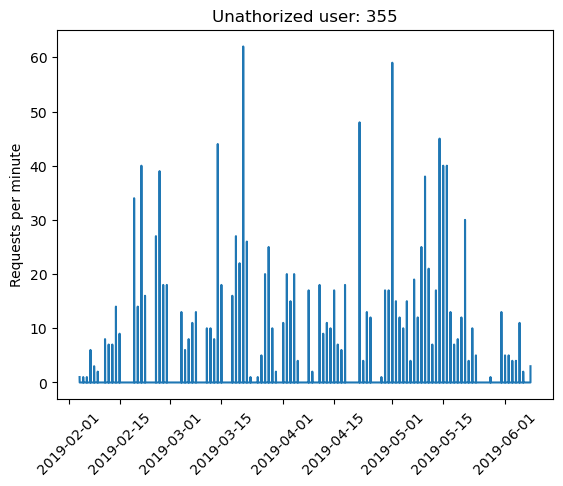

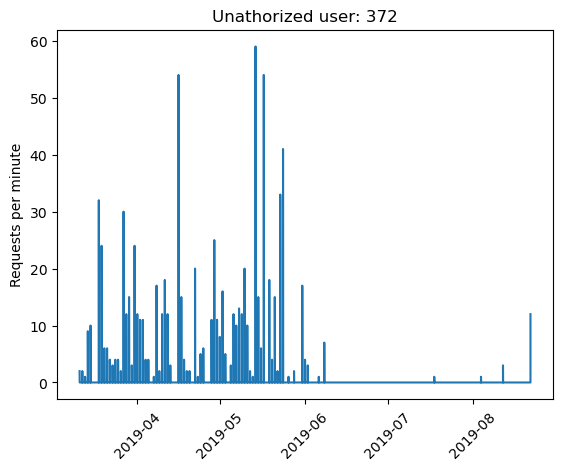

In [9]:
view_web_scraping(df) #function to ID web scrappers

# Section 3


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening?

#### It is possible that Data Science students never had access denied to Web Dev material.
#### It is possible that Web Dev had access cut off to them in September and November.

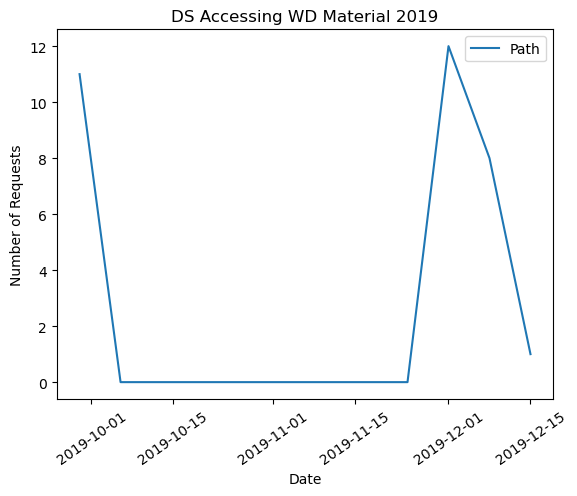

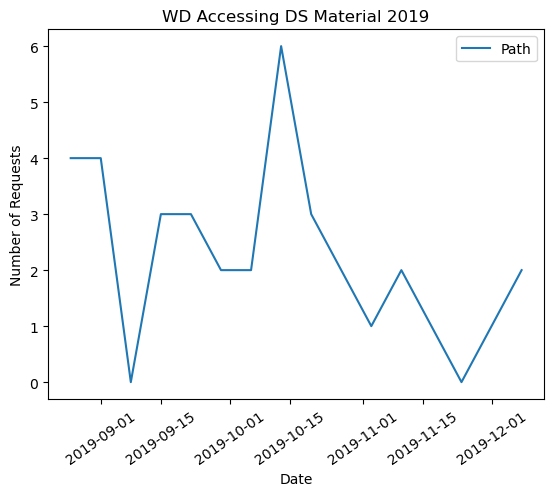

In [10]:
q5(df) #function to ID access ability